# Part 1: Crime Rate Predictive Modeling

## All necessary imports

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read in all necessary data files

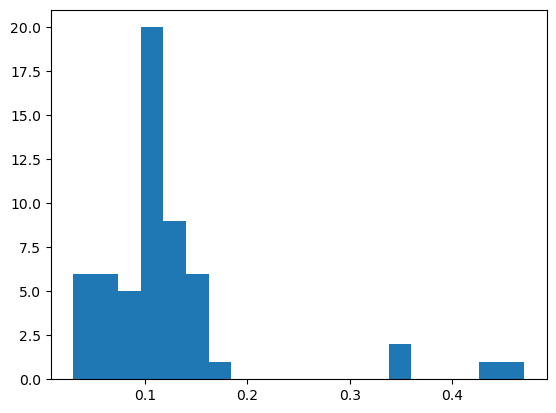

,LocationType,Location,TimeFrame,DataFormat,Dropout
10,County,Alameda,2014,Percent,0.11
16,County,Alpine,2014,Percent,NaN
22,County,Amador,2014,Percent,0.10
28,County,Butte,2014,Percent,0.10
34,County,Calaveras,2014,Percent,0.05


In [3]:
data_path = 'data/'

dropout_df = pd.read_csv(data_path + '4-Year Cohort Dropout Rate.csv')
dropout_df = dropout_df.loc[(dropout_df['LocationType'] == 'County') & (dropout_df['TimeFrame'] == 2014)]
dropout_df = dropout_df.rename(columns={'Data': 'Dropout'})
dropout_df['Dropout'] = pd.to_numeric(dropout_df['Dropout'], errors='coerce')

plt.hist(dropout_df['Dropout'], 20)
plt.show()

dropout_df.head()

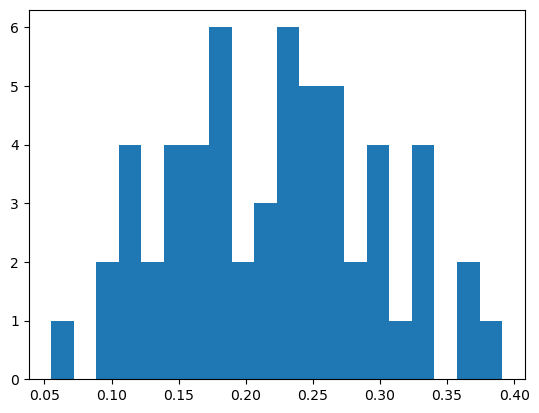

,LocationType,Location,TimeFrame,DataFormat,Poverty
6,County,Alameda,2014,Percent,0.158
13,County,Alpine,2014,Percent,0.097
16,County,Amador,2014,Percent,0.218
23,County,Butte,2014,Percent,0.245
26,County,Calaveras,2014,Percent,0.118


In [4]:
poverty_df = pd.read_csv(data_path + 'Children Living in Poverty.csv')
poverty_df = poverty_df.loc[(poverty_df['LocationType'] == 'County') & (poverty_df['TimeFrame'] == 2014)]
poverty_df = poverty_df.rename(columns={'Data': 'Poverty'})
poverty_df['Poverty'] = pd.to_numeric(poverty_df['Poverty'], errors='coerce')

plt.hist(poverty_df['Poverty'], 20)
plt.show()

poverty_df.head()

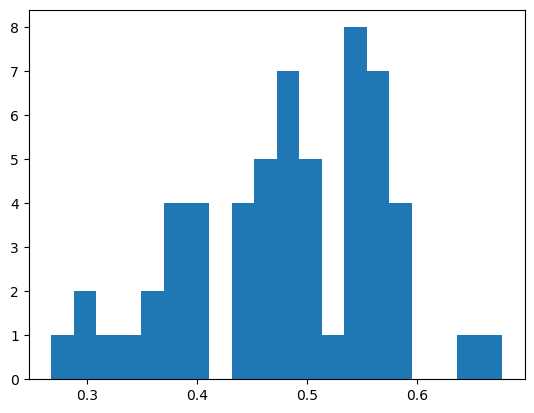

,LocationType,Location,Age group,TimeFrame,DataFormat,Dental
15,County,Alameda,0-20,2014,Percent,0.50766
39,County,Alpine,0-20,2014,Percent,0.28846
63,County,Amador,0-20,2014,Percent,0.36936
87,County,Butte,0-20,2014,Percent,0.45276
111,County,Calaveras,0-20,2014,Percent,0.35673


In [5]:
dental_df = pd.read_csv(data_path + 'Children Who Have Annual Dental Visits.csv')
dental_df = dental_df.loc[(dental_df['LocationType'] == 'County') & (dental_df['TimeFrame'] == 2014) & (dental_df['Age group'] == '0-20')]
dental_df = dental_df.rename(columns={'Data': 'Dental'})
dental_df['Dental'] = pd.to_numeric(dental_df['Dental'], errors='coerce')

plt.hist(dental_df['Dental'], 20)
plt.show()

dental_df.head()

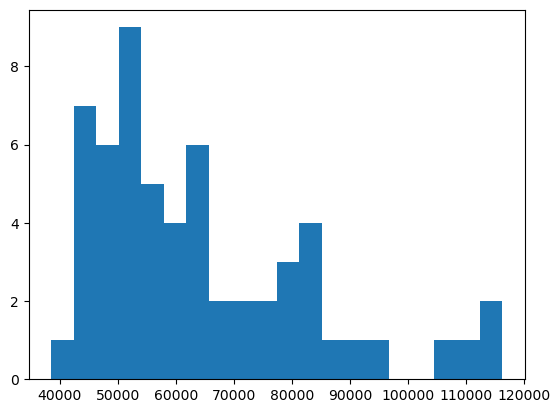

,Location,Income
0,Alameda,92574
1,Alpine,64688
2,Amador,61198
3,Butte,48443
4,Calaveras,58151


In [6]:
income_df = pd.read_csv(data_path + 'Median Household Income.csv')
income_df['Income'] = pd.to_numeric(income_df['Income'], errors='coerce')

plt.hist(income_df['Income'], 20)
plt.show()

income_df.head()

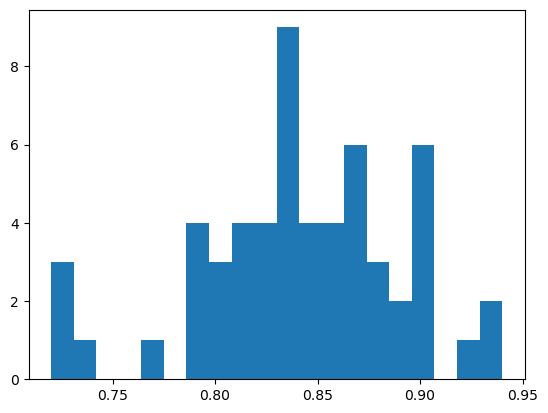

,LocationType,Location,TimeFrame,DataFormat,Math
12,County,Alameda,2014,Percent,0.85
35,County,Alpine,2014,Percent,NaN
36,County,Amador,2014,Percent,0.90
59,County,Butte,2014,Percent,0.87
61,County,Calaveras,2014,Percent,0.90


In [7]:
math_df = pd.read_csv(data_path + 'Percentage of 10th Graders Who Passed the CAHSEE Math Section.csv')
math_df = math_df.loc[(math_df['LocationType'] == 'County') & (math_df['TimeFrame'] == 2014)]
math_df = math_df.rename(columns={'Data': 'Math'})
math_df['Math'] = pd.to_numeric(math_df['Math'], errors='coerce')

plt.hist(math_df['Math'], 20)
plt.show()

math_df.head()

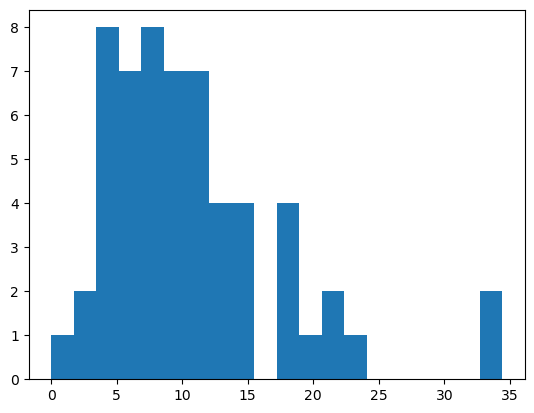

,LocationType,Location,TimeFrame,DataFormat,Abuse
16,County,Alameda,2014,Rate,2.4
46,County,Alpine,2014,Rate,0.0
48,County,Amador,2014,Rate,14.8
78,County,Butte,2014,Rate,12.9
80,County,Calaveras,2014,Rate,22.5


In [8]:
abuse_df = pd.read_csv(data_path + 'Rate of Child Abuse (per 1,000).csv')
abuse_df = abuse_df.loc[(abuse_df['LocationType'] == 'County') & (abuse_df['TimeFrame'] == 2014)]
abuse_df = abuse_df.rename(columns={'Data': 'Abuse'})
abuse_df['Abuse'] = pd.to_numeric(abuse_df['Abuse'], errors='coerce')

plt.hist(abuse_df['Abuse'], 20)
plt.show()

abuse_df.head()

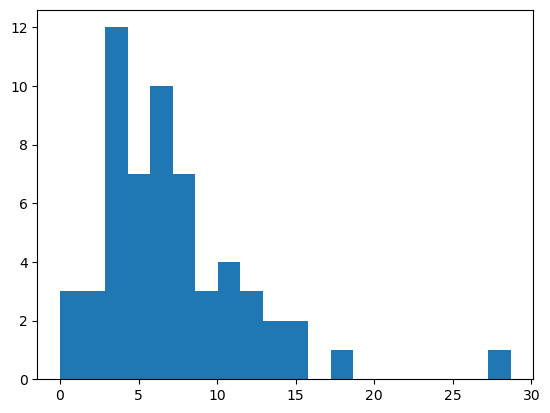

,LocationType,Location,TimeFrame,DataFormat,Foster
29,County,Alameda,2014,Rate,3.7
44,County,Alpine,2014,Rate,0.0
59,County,Amador,2014,Rate,9.0
74,County,Butte,2014,Rate,10.8
89,County,Calaveras,2014,Rate,18.2


In [9]:
foster_df = pd.read_csv(data_path + 'Rate of Children in Foster Care (per 1,000).csv')
foster_df = foster_df.loc[(foster_df['LocationType'] == 'County') & (foster_df['TimeFrame'] == 2014)]
foster_df = foster_df.rename(columns={'Data': 'Foster'})
foster_df['Foster'] = pd.to_numeric(foster_df['Foster'], errors='coerce')

plt.hist(foster_df['Foster'], 20)
plt.show()

foster_df.head()

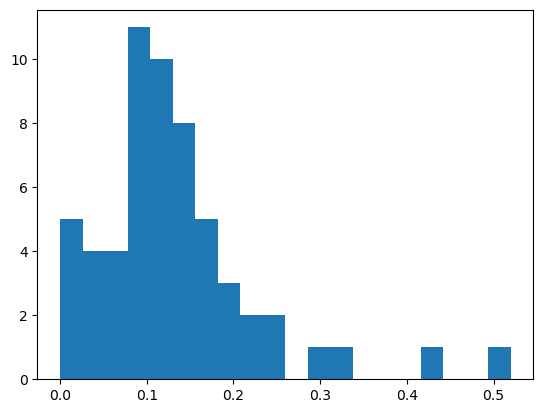

,LocationType,Location,TimeFrame,DataFormat,Afterschool
7,County,Alameda,2014,Percent,0.21
12,County,Alpine,2014,Percent,0.52
17,County,Amador,2014,Percent,0.00
22,County,Butte,2014,Percent,0.17
27,County,Calaveras,2014,Percent,0.00


In [10]:
afterschool_df = pd.read_csv(data_path + 'Students who are Low Income and Have Access to a State-Funded Afterschool Program.csv')
afterschool_df = afterschool_df.loc[(afterschool_df['LocationType'] == 'County') & (afterschool_df['TimeFrame'] == 2014)]
afterschool_df = afterschool_df.rename(columns={'Data': 'Afterschool'})
afterschool_df['Afterschool'] = pd.to_numeric(afterschool_df['Afterschool'], errors='coerce')

plt.hist(afterschool_df['Afterschool'], 20)
plt.show()

afterschool_df.head()

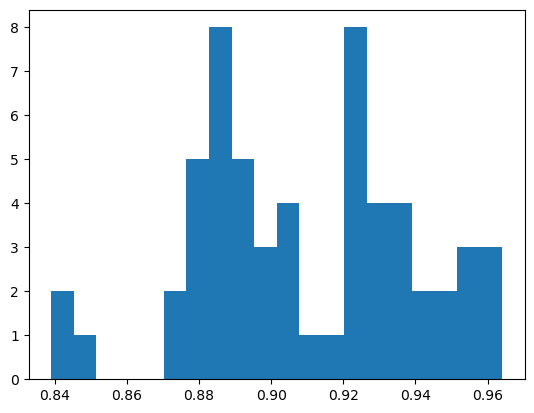

,LocationType,Location,Race,TimeFrame,DataFormat,In School
12,County,Alameda,All,2014,Percent,0.933
24,County,Alpine,All,2014,Percent,0.924
36,County,Amador,All,2014,Percent,0.924
48,County,Butte,All,2014,Percent,0.928
60,County,Calaveras,All,2014,Percent,0.924


In [11]:
in_school_df = pd.read_csv(data_path + 'Youth in School or Employed.csv')
in_school_df = in_school_df.loc[(in_school_df['LocationType'] == 'County') & (in_school_df['TimeFrame'] == 2014) & (in_school_df['Race'] == 'All')]
in_school_df = in_school_df.rename(columns={'Data': 'In School'})
in_school_df['In School'] = pd.to_numeric(in_school_df['In School'], errors='coerce')

plt.hist(in_school_df['In School'], 20)
plt.show()

in_school_df.head()

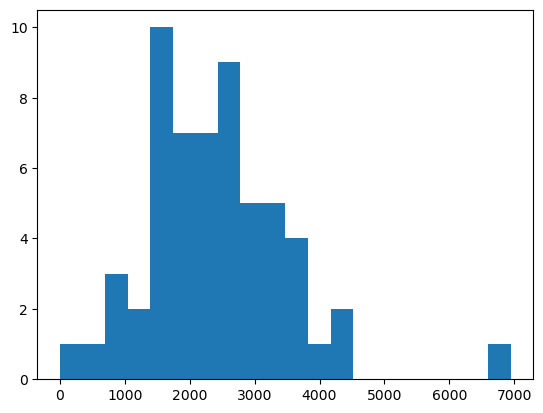

,Location,Crime Rate
0,Alameda,1484
1,Alpine,1786
2,Amador,928
3,Butte,2550
4,Calaveras,3120


In [12]:
crime_df = pd.read_csv(data_path + 'Crime (per 100,000).csv')
crime_df['Crime Rate'] = pd.to_numeric(crime_df['Crime Rate'], errors='coerce')

plt.hist(crime_df['Crime Rate'], 20)
plt.show()

crime_df.head()

## Join dataframes for individual features into a single dataframe

In [13]:
df = pd.merge(dropout_df[['Location', 'Dropout']], income_df, how='outer', on=['Location'])
df = pd.merge(poverty_df[['Location', 'Poverty']], df, how='outer', on=['Location'])
df = pd.merge(dental_df[['Location', 'Dental']], df, how='outer', on=['Location'])
df = pd.merge(math_df[['Location', 'Math']], df, how='outer', on=['Location'])
df = pd.merge(abuse_df[['Location', 'Abuse']], df, how='outer', on=['Location'])
df = pd.merge(foster_df[['Location', 'Foster']], df, how='outer', on=['Location'])
df = pd.merge(afterschool_df[['Location', 'Afterschool']], df, how='outer', on=['Location'])
df = pd.merge(in_school_df[['Location', 'In School']], df, how='outer', on=['Location'])
df = pd.merge(df, crime_df, how='outer', on=['Location'])

# Impute missing values for Alpine County
df['Math'].fillna(df['Math'].mean(), inplace=True)
df['Dropout'].fillna(df['Dropout'].mean(), inplace=True)
df

,Location,In School,Afterschool,Foster,Abuse,Math,Dental,Poverty,Dropout,Income,Crime Rate
0,Alameda,0.933,0.21,3.7,2.4,0.850000,0.50766,0.158,0.110000,92574,1484
1,Alpine,0.924,0.52,0.0,0.0,0.841053,0.28846,0.097,0.122807,64688,1786
2,Amador,0.924,0.00,9.0,14.8,0.900000,0.36936,0.218,0.100000,61198,928
3,Butte,0.928,0.17,10.8,12.9,0.870000,0.45276,0.245,0.100000,48443,2550
4,Calaveras,0.924,0.00,18.2,22.5,0.900000,0.35673,0.118,0.050000,58151,3120
5,Colusa,0.877,0.17,4.2,6.3,0.790000,0.56977,0.207,0.170000,56704,1526
6,Contra Costa,0.933,0.11,3.9,5.2,0.860000,0.44841,0.139,0.080000,93712,1329
7,Del Norte,0.886,0.20,14.5,21.7,0.740000,0.47603,0.296,0.110000,45258,1651
8,El Dorado,0.937,0.03,7.6,11.0,0.920000,0.44620,0.123,0.060000,80582,1922
9,Fresno,0.903,0.15,6.9,9.1,0.810000,0.48955,0.391,0.130000,51261,2731


## Correlation Matrix

<AxesSubplot:>

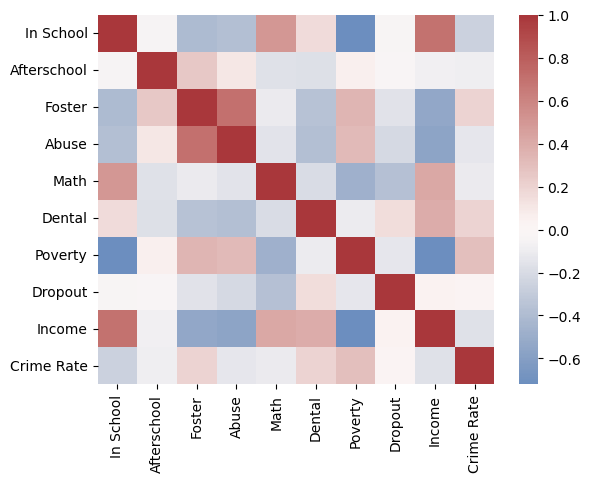

In [17]:
variables_only_df = df.drop('Location', axis=1)
sns.heatmap(variables_only_df.corr(), xticklabels=variables_only_df.columns.values, yticklabels=variables_only_df.columns.values, center=0, cmap=sns.color_palette("vlag", as_cmap=True))

## Baseline gradient boosting

In [51]:
#################### Unpruned features ####################
feature_names = ['In School', 'Afterschool', 'Foster', 'Abuse', 'Math', 'Dental', 'Poverty', 'Dropout', 'Income']
X = df[feature_names]
y = df['Crime Rate']

# 10-fold cross validation
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
gb_model = GradientBoostingRegressor(random_state=0)
results = cross_val_score(gb_model, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Output the MAE and std across all folds.
print('Without pruning features:')
print('MAE: ' + str(round(-1 * results.mean(), 4)) + '\tstd: ' + str(results.std()))

#################### Pruned features ####################
# Perform automatic feature selection
feature_selector = SelectFromModel(estimator=GradientBoostingRegressor(random_state=0)).fit(X, y)
feature_mask = feature_selector.get_support()
pruned_feature_names = [feature_names[i] for i in range(len(feature_mask)) if feature_mask[i]]
pruned_X = df[pruned_feature_names]

# 10-fold cross validation
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
gb_model = GradientBoostingRegressor(random_state=0)
results = cross_val_score(gb_model, pruned_X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Output the MAE and std across all folds.
print('After pruning features: ' + str(pruned_feature_names))
print('MAE: ' + str(round(-1 * results.mean(), 4)) + '\tstd: ' + str(results.std()))

Without pruning features:
MAE: 822.9144	std: 361.1486775089232
After pruning features: ['Foster', 'Abuse', 'Poverty']
MAE: 800.8384	std: 412.68619916854584


## Baseline random forest

In [52]:
#################### Unpruned features ####################
# 10-fold cross validation
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
rf_model = RandomForestRegressor(random_state=0)
results = cross_val_score(rf_model, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Output the MAE and std across all folds.
print('MAE: ' + str(round(-1 * results.mean(), 4)) + '\tstd: ' + str(results.std()))

#################### Pruned features ####################
# Perform automatic feature selection
feature_selector = SelectFromModel(estimator=RandomForestRegressor(random_state=0)).fit(X, y)
feature_mask = feature_selector.get_support()
pruned_feature_names = [feature_names[i] for i in range(len(feature_mask)) if feature_mask[i]]
pruned_X = df[pruned_feature_names]

# 10-fold cross validation
kfold = KFold(n_splits=10, random_state=0, shuffle=True)
rf_model = RandomForestRegressor(random_state=0)
results = cross_val_score(rf_model, pruned_X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Output the MAE and std across all folds.
print('After pruning features: ' + str(pruned_feature_names))
print('MAE: ' + str(round(-1 * results.mean(), 4)) + '\tstd: ' + str(results.std()))

MAE: 786.6016	std: 328.74862842931634
After pruning features: ['In School', 'Foster', 'Poverty', 'Dropout']
MAE: 738.4028	std: 383.78848411031487


## Improved gradient boosting

In [77]:
# Perform automatic feature selection
feature_selector = SelectFromModel(estimator=GradientBoostingRegressor(random_state=0)).fit(X, y)
feature_mask = feature_selector.get_support()
pruned_feature_names = [feature_names[i] for i in range(len(feature_mask)) if feature_mask[i]]
pruned_X = df[pruned_feature_names]

# Initialize training/cross-validation parameters
parameters = {"n_estimators": [10, 11, 12, 13, 14], "max_depth": [2, 3, 4]}
inner_cv = KFold(n_splits=10, random_state=0, shuffle=True)
outer_cv = KFold(n_splits=10, random_state=0, shuffle=True)

# 10-fold cross validation
gb_model = GradientBoostingRegressor(random_state=0)
results = cross_val_score(gb_model, pruned_X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Training, cross-validation, and evaluation
gb_gs_model = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid=parameters, cv=inner_cv)
gb_gs_model.fit(pruned_X, y)
results = cross_validate(gb_gs_model.best_estimator_, pruned_X, y, cv=outer_cv, scoring={'nmae': 'neg_mean_absolute_error'})
avg_mae = -1 * results['test_nmae'].mean()

# Output results
print('Selected features: ' + str(pruned_feature_names))
print('MAE: ' + str(round(avg_mae, 4)))
print('Best params' + str(gb_gs_model.best_params_))

Selected features: ['Foster', 'Abuse', 'Poverty']
MAE: 766.435
Best params{'max_depth': 3, 'n_estimators': 12}


## Improved random forest

In [89]:
# Perform automatic feature selection
feature_selector = SelectFromModel(estimator=RandomForestRegressor(random_state=0)).fit(X, y)
feature_mask = feature_selector.get_support()
pruned_feature_names = [feature_names[i] for i in range(len(feature_mask)) if feature_mask[i]]
pruned_X = df[pruned_feature_names]

# Initialize training/cross-validation parameters
parameters = {"n_estimators": [10, 11, 12, 13, 14], "max_depth": [2, 3, 4]}
inner_cv = KFold(n_splits=10, random_state=0, shuffle=True)
outer_cv = KFold(n_splits=10, random_state=0, shuffle=True)

# 10-fold cross validation
rf_model = RandomForestRegressor(random_state=0)
results = cross_val_score(rf_model, pruned_X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Training, cross-validation, and evaluation
rf_gs_model = GridSearchCV(estimator=RandomForestRegressor(random_state=0), param_grid=parameters, cv=inner_cv)
rf_gs_model.fit(pruned_X, y)
results = cross_validate(rf_gs_model.best_estimator_, pruned_X, y, cv=outer_cv, scoring={'nmae': 'neg_mean_absolute_error'})
avg_mae = -1 * results['test_nmae'].mean()

# Output results
print('Selected features: ' + str(pruned_feature_names))
print('MAE: ' + str(round(avg_mae, 4)))
print('Best params' + str(gb_gs_model.best_params_))

Selected features: ['In School', 'Foster', 'Poverty', 'Dropout']
MAE: 750.0689
Best params{'max_depth': 3, 'n_estimators': 12}
